# Temporal network analysis


In [1]:
# System
from pathlib import Path    

# Data wrangling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Network analysis
import networkx as nx
import netbone as nb
import community

# Project specific
from src.config import cfg
from src.utils import data_explorer as dx
from src.utils import viz, nw_utils
from src.data_prep import data_prep
from src.analysis import sponsor_nw

# Misc
from IPython.display import display

%load_ext autoreload
%autoreload 2

Can't load ECM Model in windows, try using it on linux


## Load data


In [2]:
# Load data
data = data_prep.prepare_data()

# Focus on bills with policy area
data = data.dropna(subset=["policy_area"])

In [3]:
# Brief summary
dx.summarize_df(data)

Shape: (1666433, 18)


,bioguide_id,party,state,district,sponsor_type,congress,bill_type,bill_number,origin_chamber,policy_area,title,introduced_date,bill_id,sponsor_title,sponsor_id,first_name,last_name,display_name
0,Y000031,R,FL,10,sponsor,108,hjres,114,house,economics and public finance,Making further continuing appropriations for t...,2004-11-19,108_hjres_114,Rep,Y000031_R_FL_Rep,C. W.,Young,Rep. C. W. Young (R)


In [4]:
periods = sorted(data["congress"].unique())
print(f"Periods: {periods}")

Periods: [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118]


## Senate


In [5]:
GT_S = sponsor_nw.create_temporal_network(
    data,
    congresses=None,
    bill_types=["s"],
    policy_areas=None,
)

Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter


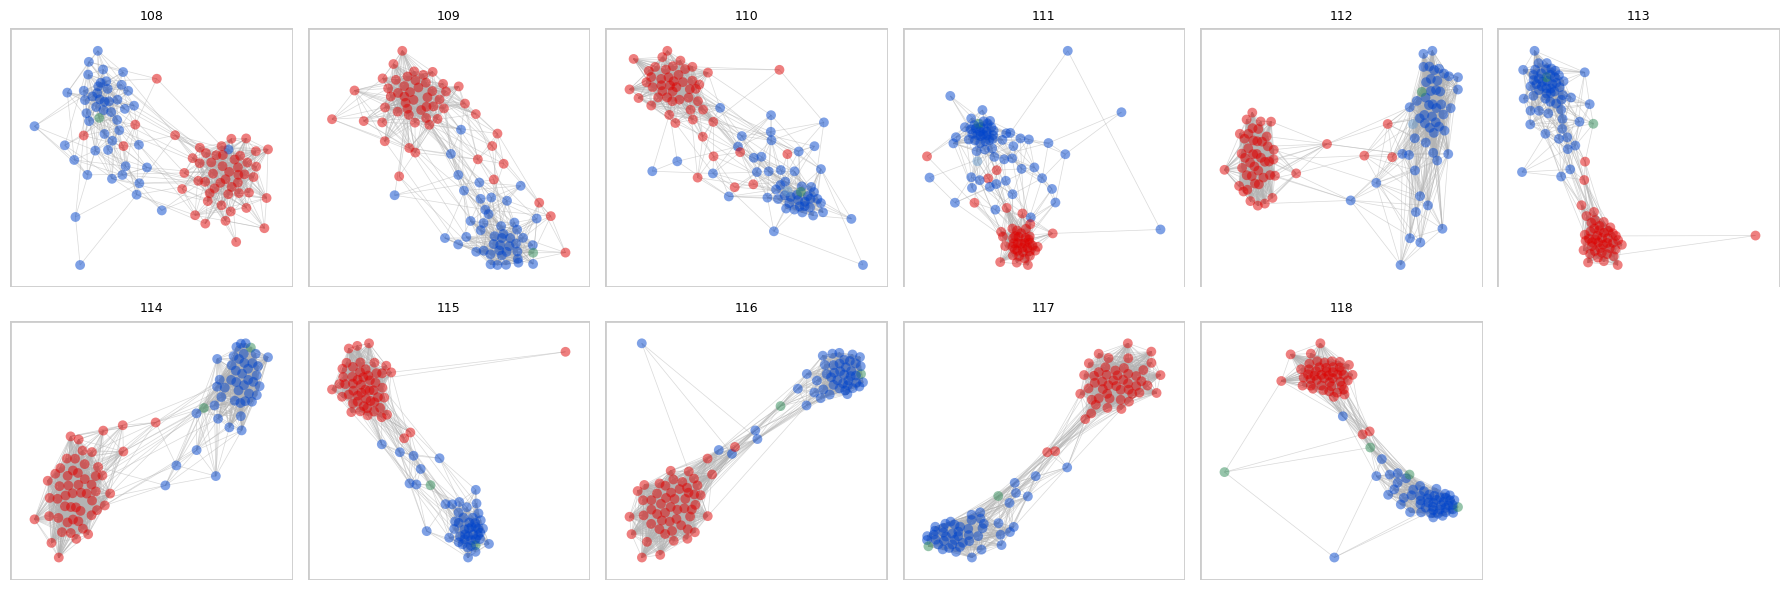

In [6]:
G_list_1 = [elem["bone"] for elem in GT_S]

sponsor_nw.draw_list_of_networks(
    G_list_1,
    captions=periods,
    n_cols=6,
    cell_size=(3, 3),
)

plt.show()

## House


In [7]:
GT_H = sponsor_nw.create_temporal_network(
    data,
    congresses=None,
    bill_types=["hr"],
    policy_areas=None,
)

Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter
Marginal Likelihood Filter


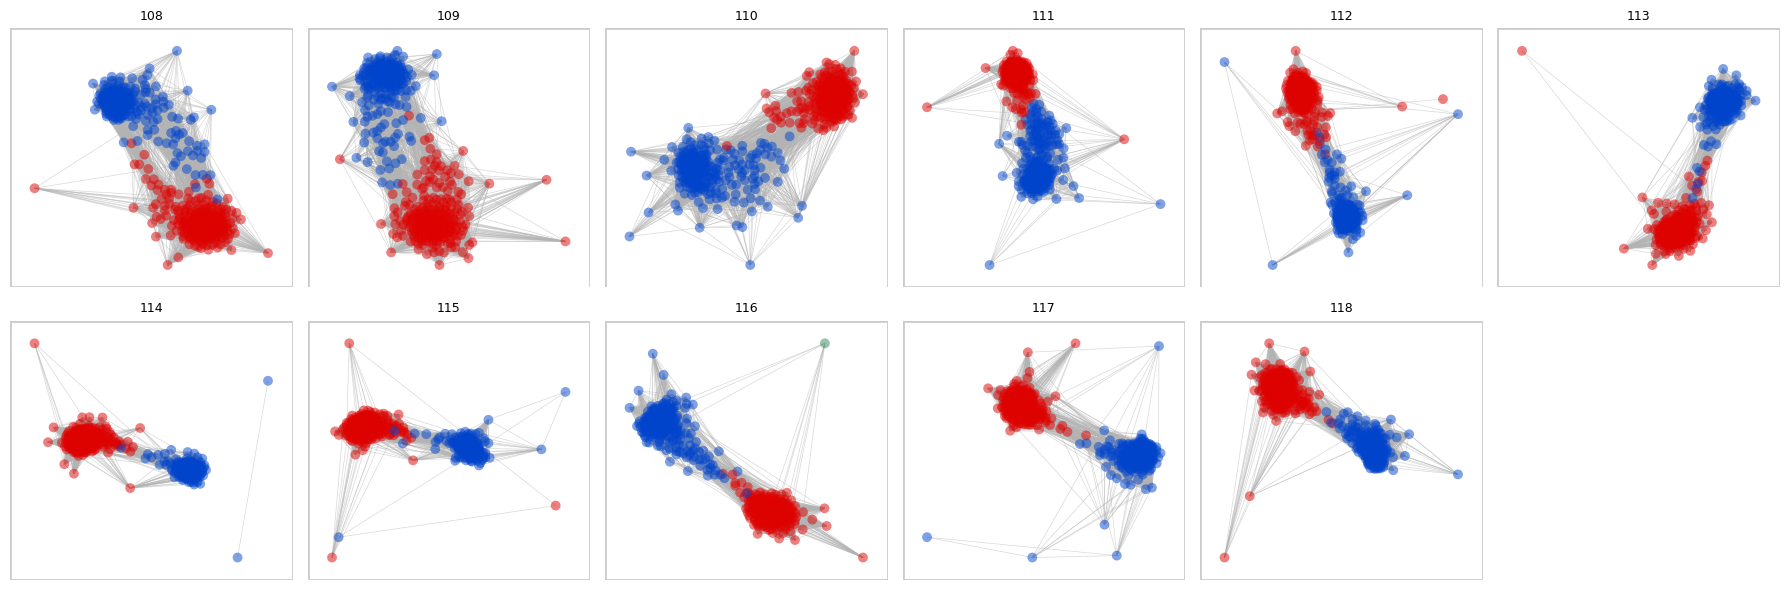

In [9]:
# Backbone networks
G_list_2 = [elem["bone"] for elem in GT_H]

sponsor_nw.draw_list_of_networks(
    G_list_2,
    captions=periods,
    n_cols=6,
    cell_size=(3, 3),
)

plt.show()